<a href="https://colab.research.google.com/github/sohang576/House-Price-Predictor-Model/blob/main/HOUSE_PRICE_PREDICTOR_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

#loading the data set
data = fetch_california_housing()
df = pd.DataFrame(data = data.data,columns=data.feature_names)
df['target'] = data.target

print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [ ]:
#exploring the data:
print(df.shape)
print(df.info())
print(df.describe)

#check for missing values:
print(df.isnull().sum())

(20640, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
<bound method NDFrame.describe of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.8173

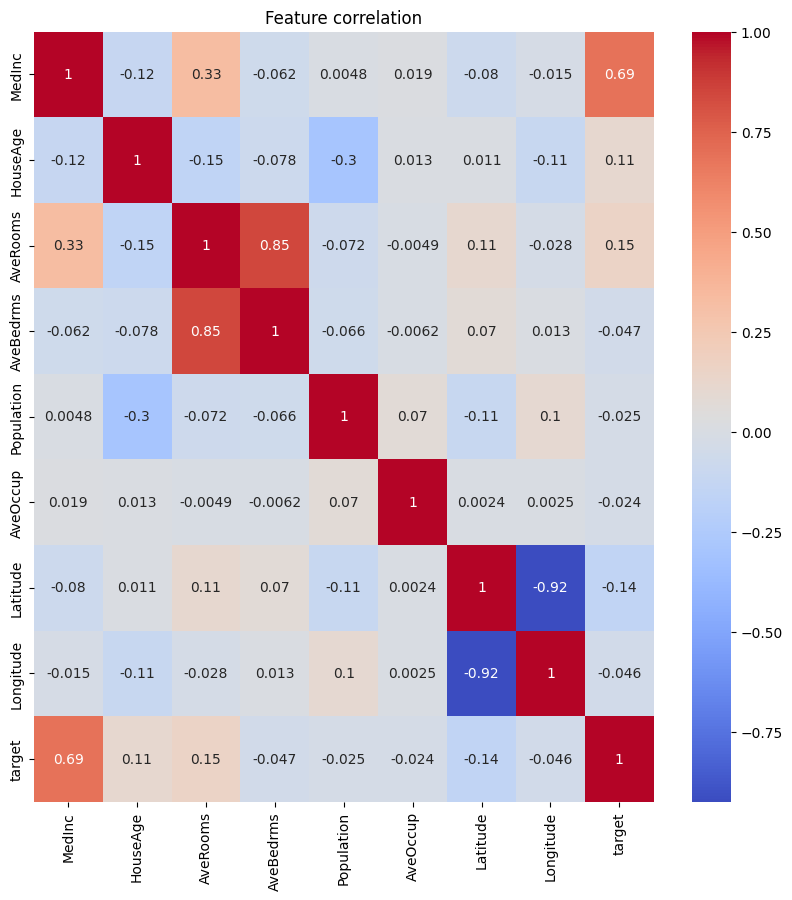

In [ ]:
#correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap = 'coolwarm')
plt.title("Feature correlation");
plt.show()

In [ ]:
X = df.drop('target',axis = 1)
Y = df['target']

In [ ]:
# Convert to NumPy array
X_np = X.to_numpy()

# Manual normalization
X_mean = X_np.mean(axis=0)
X_std = X_np.std(axis=0)
X_norm = (X_np - X_mean) / X_std


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_norm, Y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R² Score:", r2)


MSE: 0.555891598695244
R² Score: 0.5757877060324511


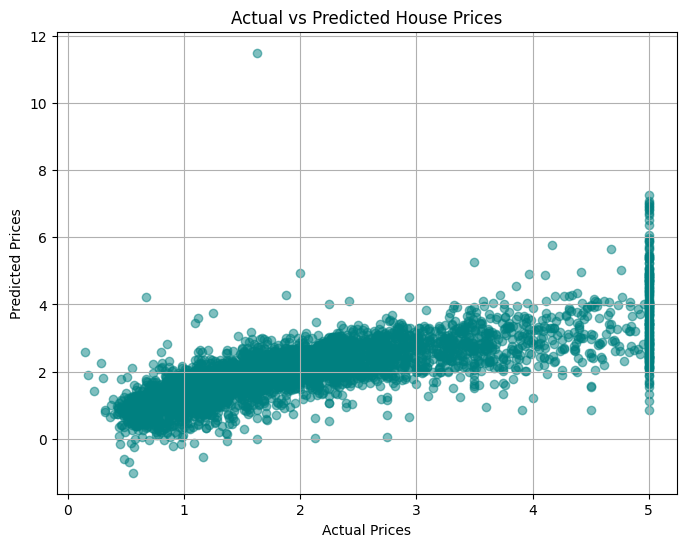

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()


| Code                                                       | Function                                                 |
| ---------------------------------------------------------- | -------------------------------------------------------- |
| `pd.DataFrame(data=data.data, columns=data.feature_names)` | Creates a DataFrame from raw data and gives column names |
| `df['Target'] = data.target`                               | Adds a new column to the DataFrame                       |
| `df.head()`                                                | Displays the first 5 rows                                |
| `df.shape`                                                 | Shows number of rows and columns                         |
| `df.info()`                                                | Displays data types, non-null counts                     |
| `df.describe()`                                            | Gives summary statistics (mean, std, min, max)           |
| `df.isnull().sum()`                                        | Checks for missing values in each column                 |
| `df.corr()`                                                | Computes pairwise correlation between features           |
| `df.drop('Target', axis=1)`                                | Removes the ‘Target’ column (axis=1 → column)            |
| `df['Target']`                                             | Selects a column by name                                 |


| Code                                        | Function                                          |
| ------------------------------------------- | ------------------------------------------------- |
| `X.to_numpy()`                              | Converts Pandas DataFrame to NumPy array          |
| `X_np.mean(axis=0)`                         | Calculates **mean** of each column (feature-wise) |
| `X_np.std(axis=0)`                          | Calculates **standard deviation** column-wise     |
| `(X_np - X_mean) / X_std`                   | Normalizes data: **(z-score normalization)**      |
| `np.array([...])` *(implicitly via Pandas)* | Converts list/structure into a NumPy array        |
